### Image DeepDream with Tensorflow.

This notebook is so I can easily test out a class I created from refactored code from the Tensorflow
documentation for creating "DeepDreamed" images. Next I'll try attempt to DeepDream a Spectrogram png
and convert it into audio.

In [1]:
from image_deep_dream.deep_dream import DeepDream  # Class I made from refactored code from tensorflow docs.
import IPython.display as display
import numpy as np
import PIL.Image
import tensorflow as tf
from tensorflow import Tensor
from typing import Optional, List, Union

IMAGES_DIR: str = '/images'  # Mounted to a docker volume.
PATH_TO_IMAGE: str = f'{IMAGES_DIR}/mazzy.png'  # My cute cat looking into a solar system projector. 😺👽

###### Some helper functions for loading in an image and displaying it.

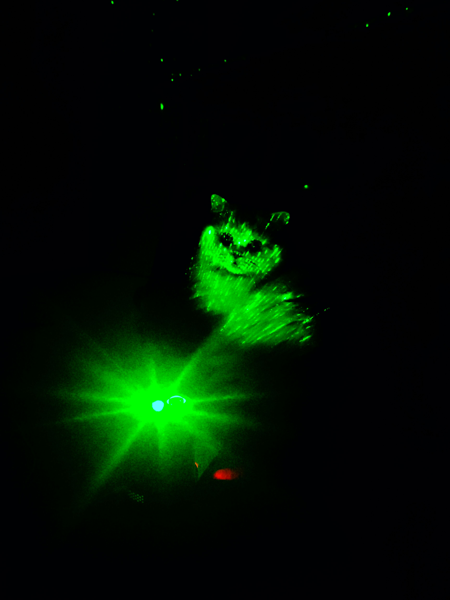

In [2]:
def convert_image_into_np_array(path_to_img: str, max_dim: Optional = int) -> np.array:
    """
    :param path_to_img: Path to an image.
    :param max_dim: Maximum dimensions of image.
    :return:

    Loads an image and converts it into a numpy array. If a value for max_dim is passed, the image
    will be resized.
    """

    _image = PIL.Image.open(path_to_img)

    if max_dim:
        _image.thumbnail((max_dim, max_dim))

    return np.array(_image)


def display_image(_image: Union[np.array, Tensor]) -> None:
    """
    :param _image: Image that's been converted into a numpy array.
    :return:

    Displays an image that's been converted into a numpy array.
    """

    display.display(PIL.Image.fromarray(np.array(_image)))


# Downsizing the image makes it easier to work with.
original_img: np.array = convert_image_into_np_array(PATH_TO_IMAGE, max_dim=600)
base_shape = tf.shape(original_img)[:-1]  # Original size of image shape, used to resize final deepdream.
display_image(original_img)


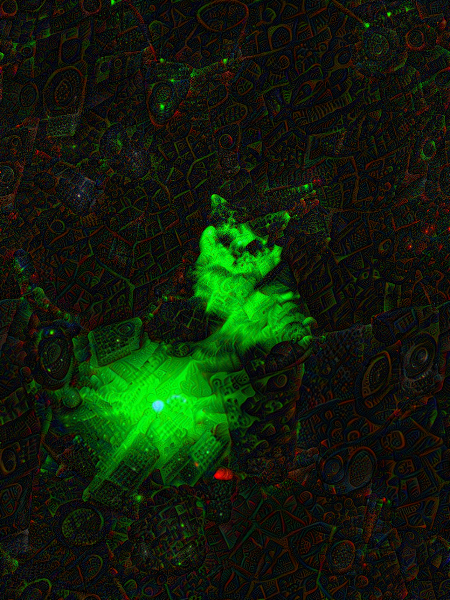

In [3]:
# Maximize the activations of these layers.
layer_names: List[str] = [
    'mixed9',
    'mixed0'
]
    
tiled_gradients = DeepDream(layer_names)

# Change settings below to achieve different results.
img = tiled_gradients.run_deep_dream(
    _img=original_img,
    steps_per_octave=50,
    step_size=0.01,
    octaves=range(-2, 5),
    octave_scale=1.3,
)

# Clear anything that might have been draw such as warnings.
display.clear_output(wait=True)

img = tf.image.resize(img, base_shape)  # Resize image to original image size.
img = tf.image.convert_image_dtype(img / 255.0, dtype=tf.uint8)

display_image(img)